# Using Python for Statical Financial Analysis

### Building Models and strategies to predict returns and evaluate risks 

### Visualising and Munging Stock Data



### Tasks Involved in Data Munging

Data munging, also known as data wrangling or data preprocessing, refers to the process of cleaning, structuring, and transforming raw data into a more suitable format for analysis or further processing. It involves various tasks such as data cleaning, data transformation, and data enrichment to ensure that the data is accurate, consistent, and ready for analysis.

1. **Data Cleaning:** Removing or correcting errors, inconsistencies, and inaccuracies in the data, such as missing values, duplicate records, and outliers.

2. **Data Transformation:** Converting data into a standardized format. This could involve changing data types, normalizing values, and handling units of measurement.

3. **Data Integration:** Combining data from different sources into a unified format. This might involve merging datasets, dealing with different naming conventions, and handling varying data structures.

4. **Feature Engineering:** Creating new features or variables from existing data that might be more informative for analysis. For example, deriving age from birth dates or calculating percentages.

5. **Data Enrichment:** Enhancing the dataset with additional information from external sources. This could include adding geolocation data, demographic information, or other relevant contextual data.

6. **Handling Missing Data:** Deciding how to deal with missing values, whether by imputing them with estimated values or making informed decisions about whether the missing data is significant enough to impact the analysis.

7. **Data Reduction:** Reducing the dimensionality of the dataset while retaining the most important information. This might involve techniques like principal component analysis (PCA) or feature selection.

## Importance of Data Munging

Data munging is a crucial step in the data analysis process, as the quality of the insights and models derived from data analysis heavily depends on the cleanliness and accuracy of the data being used. It can be a time-consuming and iterative process that requires a good understanding of the data and the domain, as well as proficiency in data manipulation tools and programming languages like Python, R, or SQL.

## Importing Data and Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
# import os

In [2]:
fb = pd.read_csv('data/facebook.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [3]:
print(fb.iloc[0,0])

2014-12-31


In [4]:
fb = pd.read_csv('data/facebook.csv',index_col=0)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


Columns:

- Date:
The index of each row - observations

- Open Price: 
The open price refers to the price at which a particular stock starts trading at the beginning of a trading session or market opening. It's the first price at which a trade occurs after the market opens.

- High Price: 
The high price is the highest trading price that a stock reaches during a given trading session or a specified time period. It indicates the maximum price that buyers were willing to pay for the stock during that period.


- High Price: 
The high price is the highest trading price that a stock reaches during a given trading session or a specified time period. It indicates the maximum price that buyers were willing to pay for the stock during that period.

- Low Price: 
The low price is the lowest trading price that a stock reaches during a given trading session or a specified time period. It represents the minimum price that buyers were willing to pay for the stock during that period.

High and low are the highest in price and the lowest in price during that day.

- Adjusted Close Price: 
The adjusted close price takes into account factors such as stock splits, dividends, and other corporate actions that can impact a stock's price. It provides a more accurate representation of a stock's value over time, considering these additional factors.

Adjust close is a stock closing price on a given day of trading that has been ammended to include any dispution and the corporate actions occurred at anytime before the next day's open.

- Volume: 
Volume refers to the total number of shares of a stock that were traded during a specified period, such as a trading session or a day. It reflects the level of market activity and interest in a particular stock. High volume often indicates increased investor interest or significant market events, while low volume might suggest less interest or a lack of trading activity.




In [5]:
# we don't get an index column now, the index is our first column from the csv file, in this case the Date column
ms = pd.read_csv('data/microsoft.csv',index_col=0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [6]:
# the index is our first column from the csv file, in this case the Date column
print(ms.iloc[0, 0])

46.73


In [7]:
fb.index

Index(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
       '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05'],
      dtype='object', name='Date', length=780)

Number of rows is the number of observations

Number of rows is the number of variables  in the data

In [8]:
fb.shape
# number of rows, number of columns


(780, 6)

In [9]:
# print summary statistics of Facebook
fb.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31   20.400000   20.510000   19.990000   20.049999   19.459270   
2015-01-02   20.129999   20.280001   19.809999   20.129999   19.536913   
2015-01-05   20.129999   20.190001   19.700001   19.790001   19.206934   
2015-01-06   19.820000   19.840000   19.170000   19.190001   18.624611   
2015-01-07   19.330000   19.500000   19.080000   19.139999   18.576082   
...                ...         ...         ...         ...         ...   
2018-01-30  241.110001  246.419998  238.410004  242.720001  242.720001   
2018-01-31  245.770004  249.270004  244.449997  245.800003  245.800003   
2018-02-01  238.520004  246.899994  238.059998  240.500000  240.500000   
2018-02-02  237.000000  237.970001  231.169998  233.520004  233.520004   
2018-02-05  227.000000  233.229996  205.000000  213.699997  213.699997   

   

## Locating, slicing and subseting the dataframe  iloc , loc

Having a look at the 2015 subset of data

iloc : selecting by label    iloc(index lable, column name)

loc : selecting by position     loc(row number, column number)

In [10]:
fb.loc['2015-01-01':'2015-12-31',:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
...,...,...,...,...,...,...
2015-12-24,32.959999,33.250000,32.910000,33.169998,32.726662,1311200
2015-12-28,32.820000,33.139999,32.360001,33.139999,32.697067,3550600
2015-12-29,33.160000,33.779999,33.070000,33.680000,33.229843,5091500


In [11]:
# loc uses names of columns
fb.loc['2015-01-01':'2015-12-31','Close']

Date
2015-01-02    20.129999
2015-01-05    19.790001
2015-01-06    19.190001
2015-01-07    19.139999
2015-01-08    19.860001
                ...    
2015-12-24    33.169998
2015-12-28    33.139999
2015-12-29    33.680000
2015-12-30    33.389999
2015-12-31    32.959999
Name: Close, Length: 252, dtype: float64

In [12]:
# Find the integer index corresponding to the start date of 2015
start_index = fb.index.get_loc('2015-01-02')
# there is no 2015-01-01 so I chose 2015-01-02


# Find the integer index corresponding to the end date of 2015
end_index = fb.index.get_loc('2015-12-31')

print(start_index, end_index)

1 252


In [13]:
# Use iloc to slice the DataFrame based on the integer indices
fb.iloc[start_index:end_index + 1, :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
...,...,...,...,...,...,...
2015-12-24,32.959999,33.250000,32.910000,33.169998,32.726662,1311200
2015-12-28,32.820000,33.139999,32.360001,33.139999,32.697067,3550600
2015-12-29,33.160000,33.779999,33.070000,33.680000,33.229843,5091500


In [14]:
# iloc uses index instead ( data only of the open price )
fb.iloc[:,:1]

,Open
Date,
2014-12-31,20.400000
2015-01-02,20.129999
2015-01-05,20.129999
2015-01-06,19.820000
2015-01-07,19.330000
...,...
2018-01-30,241.110001
2018-01-31,245.770004
2018-02-01,238.520004


## Plot the stock data using plot() method

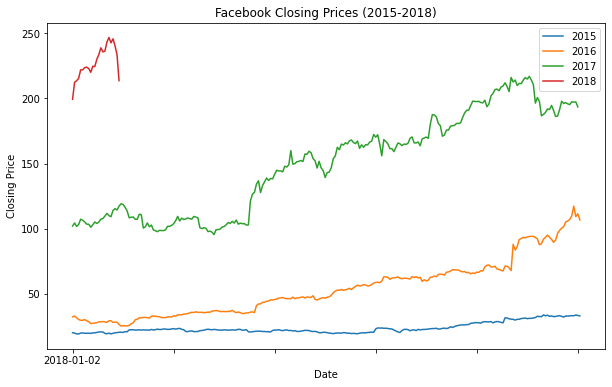

In [15]:
# Create a single plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plot closing prices for each year
fb.loc['2015-01-01':'2015-12-31', 'Close'].plot(label='2015')
fb.loc['2016-01-01':'2016-12-31', 'Close'].plot(label='2016')
fb.loc['2017-01-01':'2017-12-31', 'Close'].plot(label='2017')
fb.loc['2018-01-01':'2018-12-31', 'Close'].plot(label='2018')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Prices (2015-2018)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [16]:
fb.index = pd.to_datetime(fb.index)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


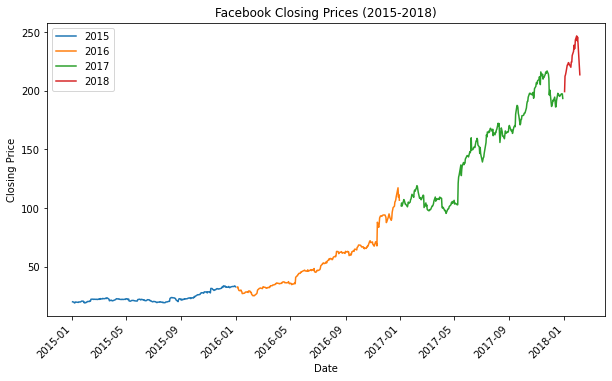

In [17]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot closing prices for each year
fb.loc['2015-01-01':'2015-12-31', 'Close'].plot(label='2015')
fb.loc['2016-01-01':'2016-12-31', 'Close'].plot(label='2016')
fb.loc['2017-01-01':'2017-12-31', 'Close'].plot(label='2017')
fb.loc['2018-01-01':'2018-12-31', 'Close'].plot(label='2018')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Prices (2015-2018)')

# Rotate x-axis date labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [18]:
ms.index = pd.to_datetime(ms.index)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [19]:
# print the price of Microsoft on '2016-03-16'
ms_2016 = ms.loc['2016-01-01':'2016-12-31']
print(ms_2016.loc['2016-03-16'])

Open         5.345000e+01
High         5.460000e+01
Low          5.340000e+01
Close        5.435000e+01
Adj Close    5.187095e+01
Volume       3.169170e+07
Name: 2016-03-16 00:00:00, dtype: float64


In [20]:
# alternative way
print(ms.loc['2016-03-16'])

Open         5.345000e+01
High         5.460000e+01
Low          5.340000e+01
Close        5.435000e+01
Adj Close    5.187095e+01
Volume       3.169170e+07
Name: 2016-03-16 00:00:00, dtype: float64


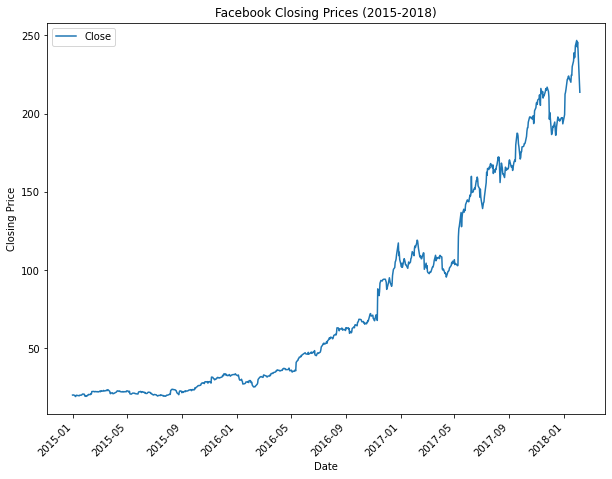

In [21]:
plt.figure(figsize=(10, 8))
fb['Close'].plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Prices (2015-2018)')

# Rotate x-axis date labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()
plt.show()

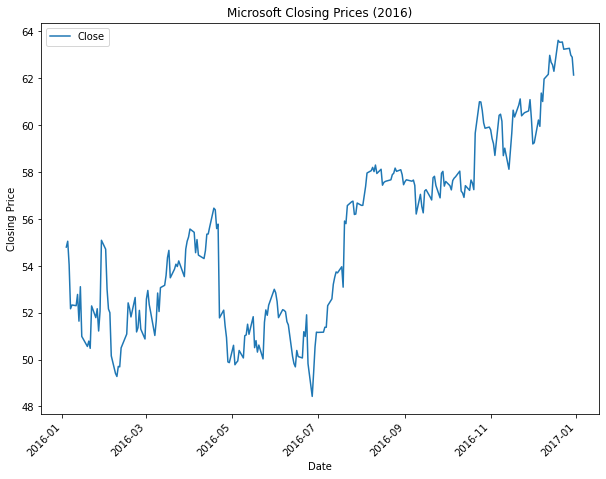

In [22]:
# plot only the Close price of 2016 of Microsoft, 1 line 
plt.figure(figsize=(10, 8))
ms.loc['2016-01-01':'2016-12-31','Close'].plot()


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft Closing Prices (2016)')

# Rotate x-axis date labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()
plt.show()


In [23]:
# selecting only some columns

fb[['Open','Close']]

,Open,Close
Date,,
2014-12-31,20.400000,20.049999
2015-01-02,20.129999,20.129999
2015-01-05,20.129999,19.790001
2015-01-06,19.820000,19.190001
2015-01-07,19.330000,19.139999
...,...,...
2018-01-30,241.110001,242.720001
2018-01-31,245.770004,245.800003
2018-02-01,238.520004,240.500000


## New Columns and Variables 

Making a new column of the close price of tomorrow

.shift() moves a whole column upwards by 1 row (-1)

shifted_series = original_series.shift(periods, freq=None, axis=0, fill_value=None)


Here's what each parameter means:

periods: The number of periods by which the data will be shifted. Positive values shift the data forward (towards the end of the Series), while negative values shift the data backward (towards the beginning of the Series).

freq: Optional. The frequency level at which to shift the data. This is useful for handling time-based data with irregular time intervals.

axis: Specifies the axis along which the shift should be applied. For Series, it's typically 0. For DataFrames, you can use 0 or 1 for rows and columns, respectively.

fill_value: Optional. The value to use for filling any missing or NaN values that result from the shifting. By default, NaN is used.

In [24]:
# creating a new column - Price1
# this is going to be the closing price of tomorrow
fb['Close_Price_Tomorrow'] = fb['Close'].shift(-1)

# we basically moved the entire column of Close Price to a row upwards and made it a new column

fb.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500,19.940001
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500,19.690001
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300,19.660000
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700,19.740000


In [25]:
fb['Close_Price_Tomorrow'] = fb['Close'].shift(-1, freq=None, axis=0, fill_value=None)

fb.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001


### Creating a new varibable called Price_Diff

Price_Diff is the price change between tomorrow and today (prediction variable)



In [26]:
fb['Price_Diff'] = fb['Close_Price_Tomorrow'] - fb['Close']
# fb['Price_Diff'] =  fb['Close'].shift(-1) - fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff
Date,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002


In [27]:
# Calculating the daily return = price difference / close price of the day

fb['Return'] = fb['Price_Diff']/ fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618


Creating a new variable called direction:

Rules:

- pricediff > 0   -> DIRETION = UP    DENOTED AS 1

- pricediff <= 0   -> DIRETION = DOWN    DENOTED AS -1


The direction is determined by PriceDiff. 

If PriceDiff is positive, the direction is up and denoted as one. Otherwise, it's down and denoted as negative one. 

We cannot use column-wise transformation of any columns to get "direction". Instead, we will use List comprehension. Here's the code for the List comprehension. 

The formula it will give value 1 for Direction if PriceDiff is positive. Otherwise, it is negative. 

The yellow part defines the domain in which this operation will be performed. ei is a name for any Index of fb. It means for any index ei, Direction will be valued according to the condition defined in the red region. 

List comprehension is a very important tool for creation of new variables following very complicated rules. 



In [28]:
fb['Direction'] = [ 1 if fb.loc[ei, 'Price_Diff'] > 0 else -1 for ei in fb.index]
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction
Date,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1


A Moving average is a widely used signal in stock trading, which is loading average price over a defined number of days. 

Random fluctuations are very common in stock price. 

Taking an average price in a period can smooth out noise. 

It is sought to be good to find the trend. 

For example, we want to calculate the moving average of close price over three days, which is the average of Close price of today, yesterday, and the day before yesterday.

Shift(1) is to shift the whole column downward by one row. Hence, at any given row or day, the shifted Close price in fact is a Close price of yesterday.

What is shift(2): It shifts the column of Close price downward by two rows, which get the Close price two days ago. We found NaN at the top which means Not a Number. Since we do not have data before December 31, we get NaN in the top two rows if we move the columns downward by two rows. If a new variable is created using shift Close price that we also has NaN values at the top two rows.

In [29]:
fb['Moving_Average_3Days'] = (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2))/3
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,Moving_Average_3Days
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334


In [30]:
# MA40 is a moving average Close price over 40 days, and MA200 is a moving average price over 200 days.
# Rolling is a very nice method to provide us rolling window calculation. We can use this rolling window to calculate mean even sum. 
fb['MA40'] = fb['Close'].rolling(40).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
fb.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,Moving_Average_3Days,MA40,MA200
Date,,,,,,,,,,,,,
2018-01-23,235.850006,239.830002,235.100006,238.910004,238.910004,11880700,235.800003,-3.110001,-0.013017,-1,234.236669,205.710500,169.57280
2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300,236.350006,0.550003,0.002332,1,236.133336,206.181500,170.25015
2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100,243.330002,6.979996,0.029532,1,237.020004,206.736750,170.94305
2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900,246.850006,3.520004,0.014466,1,238.493337,207.552250,171.66910
2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900,242.720001,-4.130005,-0.016731,-1,242.176671,208.813000,172.41680
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690,1,244.300003,209.863250,173.15295
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562,-1,245.123337,211.066251,173.88580
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023,-1,243.006668,212.412250,174.59185
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.084875,-1,239.940002,213.556750,175.26105


## Ploting the columns I created

<Axes: xlabel='Date'>

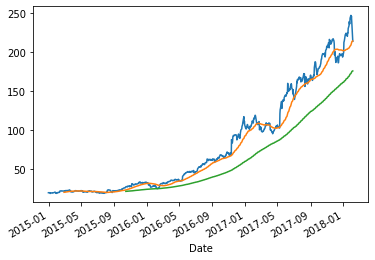

In [31]:
# You can see those moving average smooth the original Close price
fb['Close'].plot()
fb['MA40'].plot()
fb['MA200'].plot()

## Microsoft New Variables and Columns :

In [32]:
ms['Close_Price_Tomorrow'] = ms['Close'].shift(-1)
ms['Price_Diff'] =  ms['Close'].shift(-1) - ms['Close']

# lets run this code to display the price difference of Microsoft on 2015-01-05
print("MS price difference on 2015-01-05 : ", ms['Price_Diff'].loc['2015-01-05'])
ms.head()

MS price difference on 2015-01-05 :  -0.6799999999999997


,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000


In [33]:
#Create a new column Return in the DataFrame fb
ms['Return'] = ms['Price_Diff'] / ms['Close']
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

ms.head()

-0.014677314281143345


,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return
Date,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418


In [34]:
# Create a new column in the DataFrame using List Comprehension - Direction
# The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
# for every record in the DataFrame - fb

ms['Direction'] = [1 if ms['Price_Diff'].loc[price] > 0 else 0 for price in fb.index ]
# could have also used -1 instead of 0
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction
Date,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674,1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418,1


In [35]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['Price_Diff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average


formula for Moving Average:

['Moving_Average_3Days'] = (['Close'] + ['Close'].shift(1) + ['Close'].shift(2))/3

shift positive moves it downwards, ( price yesterday)

shift negative moves it upwards, ( price tomorrow )


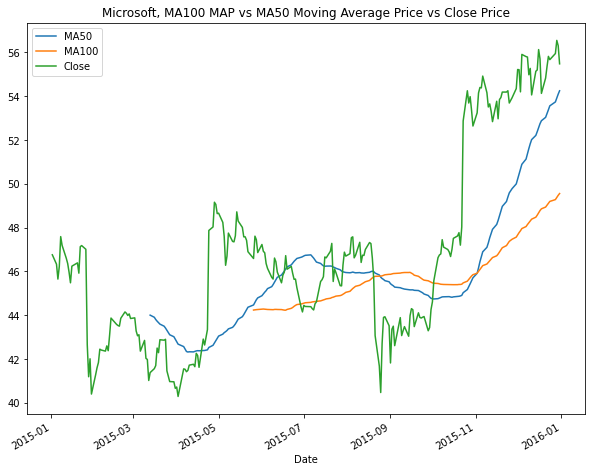

In [36]:
ms['ma50'] = ms['Close'].rolling(50).mean()
ms['ma100'] = ms['Close'].rolling(100).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
ms['ma100'].loc['2015-01-01':'2015-12-31'].plot(label='MA100')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.title('Microsoft, MA100 MAP vs MA50 Moving Average Price vs Close Price')
plt.legend()
plt.show()

 You can see those moving average smooth the original Close price. 
 
 Moving average 50 which is colored as blue is more closely associated with Close price than moving average 200. Hence, we call moving average 50 is a fast signal and MA200 is a slow signal which reflects the price over a long history. 

 MA50: FAST SIGNAL

 MA200: SLOW SIGNAL (reflects price over a longer history)
 
 If MA50 is above MA200, some traders who we call trend-following traders, they believe the stock price will move upwards for a while. 

In [37]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,ma50,ma100
Date,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674,1,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196,0,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677,0,NaN,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705,1,NaN,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418,1,NaN,NaN


If FAST SIGNAL is larger than SLOW SIGNAL, this indicates an upward trend at the current position.

Use longer moving average as slow signal and shorter moving average as fast signal.

- Moving Average of short period is more closely associated with recent change of stock price, which we call Fast Signal.

- Moving Average over long period reflects the price change over long-term history, which we call slow signal.


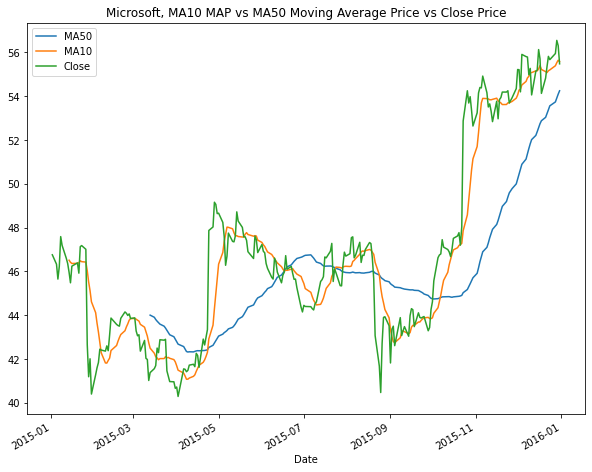

In [38]:
ms['ma10'] = ms['Close'].rolling(10).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
ms['ma10'].loc['2015-01-01':'2015-12-31'].plot(label='MA10')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.title('Microsoft, MA10 MAP vs MA50 Moving Average Price vs Close Price')
plt.legend()
plt.show()

IF MA10 > MA50 -> BUY and hold shares

If MA10 is larger than MA50, the stock price is believed by some traders, that it goes up in the next several days.

Otherwise, the price will decrease. Our strategy is, if MA10 is larger than MA50, we will buy and hold one share of stock. 

Alternately speaking, we will long one share of stock. This yellow area labels the days on which we buy and hold one share of stock.

### Lets create a variable to see if we buy (LONG) or sell (SHORT)

long = 1 

short = 0

In [39]:
ms['Shares'] = [1 if ms.loc[price, 'ma10'] > ms.loc[price, 'ma50'] else 0 for price in ms.index]
ms

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,ma50,ma100,ma10,Shares
Date,,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674,1,NaN,NaN,NaN,0
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196,0,NaN,NaN,NaN,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677,0,NaN,NaN,NaN,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705,1,NaN,NaN,NaN,0
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418,1,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,2.270004,0.024477,1,86.5244,82.3042,91.862,1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,-0.750000,-0.007894,0,86.7606,82.5109,92.349,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,91.779999,-2.480003,-0.026310,0,86.9978,82.7137,92.765,1


## FB new columns profilt / loss 

In [40]:
fb

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,Moving_Average_3Days,MA40,MA200
Date,,,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN,NaN,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN,NaN,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000,NaN,NaN
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334,NaN,NaN
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690,1,244.300003,209.863250,173.15295
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562,-1,245.123337,211.066251,173.88580
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023,-1,243.006668,212.412250,174.59185


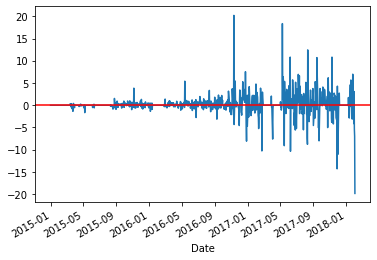

In [42]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
fb['ma10'] = fb['Close'].rolling(10).mean()
fb['ma50'] = fb['Close'].rolling(50).mean()
fb['Shares'] = [1 if fb.loc[price, 'ma10'] > fb.loc[price, 'ma50'] else 0 for price in fb.index]
fb['Profit'] = [fb.loc[ei, 'Close_Price_Tomorrow'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

Use .cumsum() to display our model's performance if we follow the strategy 

In [43]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,Close_Price_Tomorrow,Price_Diff,Return,Direction,Moving_Average_3Days,MA40,MA200,ma50,ma10,Shares,Profit,wealth
Date,,,,,,,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690,1,244.300003,209.863250,173.15295,210.030001,235.692003,1,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562,-1,245.123337,211.066251,173.88580,210.713801,237.800003,1,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023,-1,243.006668,212.412250,174.59185,211.296601,239.406003,1,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.084875,-1,239.940002,213.556750,175.26105,211.685401,239.747003,1,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,NaN,NaN,NaN,-1,229.240000,214.167750,175.82325,211.638401,237.748003,1,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

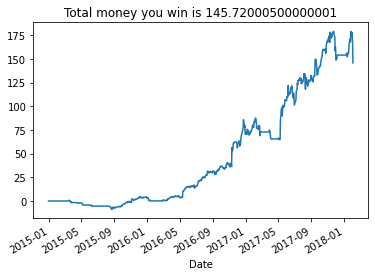

In [44]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))